#### ETFs are a collection of investments, such as equities or bonds, that trade on exchanges and generally track a specific index. They can be bought or sold like a common stock on a stock exchange, and can be bought or sold intraday at different prices.

In [25]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans


In [2]:
df = pd.read_csv('ETFs.csv')
df

,fund_symbol,quote_type,region,fund_short_name,fund_long_name,currency,fund_category,fund_family,exchange_code,exchange_name,...,fund_stdev_5years,fund_sharpe_ratio_5years,fund_treynor_ratio_5years,fund_alpha_10years,fund_beta_10years,fund_mean_annual_return_10years,fund_r_squared_10years,fund_stdev_10years,fund_sharpe_ratio_10years,fund_treynor_ratio_10years
0,AAAU,ETF,US,DWS RREEF Real Assets Fund - Cl,DWS RREEF Real Assets Fund - Class A,USD,NaN,DWS,PCX,NYSEArca,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AADR,ETF,US,AllianzGI Health Sciences Fund,Virtus AllianzGI Health Sciences Fund Class P,USD,Foreign Large Growth,Virtus,NGM,NasdaqGM,...,19.30,0.62,9.66,3.32,0.96,0.79,73.64,16.78,0.53,8.15
2,AAXJ,ETF,US,NaN,American Century One Choice Blend+ 2015 Portfo...,USD,Pacific/Asia ex-Japan Stk,American Century Investments,NGM,NasdaqGM,...,15.91,0.66,10.37,0.30,0.99,0.55,78.24,16.83,0.36,4.81
3,ABEQ,ETF,US,Thrivent Large Cap Growth Fund,Thrivent Large Cap Growth Fund Class A,USD,Large Value,Thrivent Funds,PCX,NYSEArca,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ACES,ETF,US,NaN,American Century One Choice Blend+ 2015 Portfo...,USD,Miscellaneous Sector,American Century Investments,PCX,NYSEArca,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2305,EPP,ETF,US,Cboe Vest S&P 500 Buffer Strate,CBOE Vest S&P 500 Buffer Strategy Fund Class C...,USD,Pacific/Asia ex-Japan Stk,CBOE Vest,PCX,NYSEArca,...,16.88,0.48,6.57,-0.50,1.11,0.55,83.67,18.28,0.32,3.94
2306,ERUS,ETF,US,Buffalo Flexible Income Fund,Buffalo Flexible Income Fund,USD,Miscellaneous Region,Buffalo,PCX,NYSEArca,...,23.34,0.70,12.44,-3.60,1.40,0.44,59.31,27.56,0.17,0.58
2307,EWA,ETF,US,Buffalo Dividend Focus Fund,Buffalo Dividend Focus Fund,USD,Miscellaneous Region,Buffalo,PCX,NYSEArca,...,19.27,0.48,6.51,-0.58,1.17,0.57,75.70,20.30,0.31,3.60
2308,EWC,ETF,US,"Buffalo Large Cap Fund, Inc.",Buffalo Large Cap Fund,USD,Miscellaneous Region,Buffalo,PCX,NYSEArca,...,18.14,0.61,9.05,-1.14,1.00,0.44,76.01,17.31,0.27,3.25


In [3]:
x = pd.get_dummies(df[['top10_holdings','investment_strategy','investment_type','size_type']]).replace({True:1,False:0})

In [4]:
df.select_dtypes(include='object')

,fund_symbol,quote_type,region,fund_short_name,fund_long_name,currency,fund_category,fund_family,exchange_code,exchange_name,exchange_timezone,investment_strategy,inception_date,investment_type,size_type,top10_holdings,returns_as_of_date
0,AAAU,ETF,US,DWS RREEF Real Assets Fund - Cl,DWS RREEF Real Assets Fund - Class A,USD,NaN,DWS,PCX,NYSEArca,America/New_York,The investment seeks total return in excess of...,2018-07-24,NaN,NaN,"""Cayman Real Assets Fund Ltd."": 0.1098, CCI (""...",2021-08-31
1,AADR,ETF,US,AllianzGI Health Sciences Fund,Virtus AllianzGI Health Sciences Fund Class P,USD,Foreign Large Growth,Virtus,NGM,NasdaqGM,America/New_York,The investment seeks long-term capital appreci...,2010-07-20,Blend,Large,"AZN. L (""AstraZeneca PLC ADR""): 0.0585, MDT (""...",2021-06-30
2,AAXJ,ETF,US,NaN,American Century One Choice Blend+ 2015 Portfo...,USD,Pacific/Asia ex-Japan Stk,American Century Investments,NGM,NasdaqGM,America/New_York,The investment seeks the highest total return ...,2008-08-13,Blend,Large,"AVBNX (""Avantis© Core Fixed Income G""): 0.2708...",2021-07-31
3,ABEQ,ETF,US,Thrivent Large Cap Growth Fund,Thrivent Large Cap Growth Fund Class A,USD,Large Value,Thrivent Funds,PCX,NYSEArca,America/New_York,The investment seeks long-term capital appreci...,2020-01-21,Value,Large,"AMZN (""Amazon.com Inc""): 0.1102, MSFT (""Micros...",2021-06-30
4,ACES,ETF,US,NaN,American Century One Choice Blend+ 2015 Portfo...,USD,Miscellaneous Sector,American Century Investments,PCX,NYSEArca,America/New_York,The investment seeks the highest total return ...,2018-06-27,Growth,Medium,"AVBNX (""Avantis© Core Fixed Income G""): 0.2708...",2021-06-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2305,EPP,ETF,US,Cboe Vest S&P 500 Buffer Strate,CBOE Vest S&P 500 Buffer Strategy Fund Class C...,USD,Pacific/Asia ex-Japan Stk,CBOE Vest,PCX,NYSEArca,America/New_York,"The investment seeks to track, before fees and...",2001-10-25,Blend,Large,"SPY (""SPDR© S&P 500 ETF""): 0.0891, ""Option on ...",2021-07-31
2306,ERUS,ETF,US,Buffalo Flexible Income Fund,Buffalo Flexible Income Fund,USD,Miscellaneous Region,Buffalo,PCX,NYSEArca,America/New_York,The investment seeks to generate high current ...,2010-11-09,Value,Large,"MSFT (""Microsoft Corp""): 0.0748, ""Nuance Commu...",2021-06-30
2307,EWA,ETF,US,Buffalo Dividend Focus Fund,Buffalo Dividend Focus Fund,USD,Miscellaneous Region,Buffalo,PCX,NYSEArca,America/New_York,The investment seeks current income; long-term...,1996-03-12,Blend,Large,"MSFT (""Microsoft Corp""): 0.0436, FIGXX (""Fidel...",2021-07-31
2308,EWC,ETF,US,"Buffalo Large Cap Fund, Inc.",Buffalo Large Cap Fund,USD,Miscellaneous Region,Buffalo,PCX,NYSEArca,America/New_York,The investment seeks long-term growth of capit...,1996-03-12,Blend,Large,"MSFT (""Microsoft Corp""): 0.095, AMZN (""Amazon....",2021-06-30


In [5]:
df.select_dtypes(include='number')

,avg_vol_3month,avg_vol_10day,total_net_assets,day50_moving_average,day200_moving_average,week52_high_low_change,week52_high_low_change_perc,week52_high,week52_high_change,week52_high_change_perc,...,fund_stdev_5years,fund_sharpe_ratio_5years,fund_treynor_ratio_5years,fund_alpha_10years,fund_beta_10years,fund_mean_annual_return_10years,fund_r_squared_10years,fund_stdev_10years,fund_sharpe_ratio_10years,fund_treynor_ratio_10years
0,239238,255410.0,3.844486e+08,17.807,17.818,2.75,0.14146,19.44,-1.7200,-0.08848,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2596,3170.0,8.883616e+07,64.555,65.297,11.82,0.17042,69.36,-7.8645,-0.11339,...,19.30,0.62,9.66,3.32,0.96,0.79,73.64,16.78,0.53,8.15
2,1036417,1287600.0,5.574672e+09,86.132,90.435,19.99,0.19514,102.44,-19.4300,-0.18967,...,15.91,0.66,10.37,0.30,0.99,0.55,78.24,16.83,0.36,4.81
3,4280,8540.0,4.969417e+07,27.639,27.389,4.34,0.15069,28.80,-1.6900,-0.05868,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,106048,51400.0,1.007483e+09,73.532,72.601,40.67,0.39982,101.72,-33.8900,-0.33317,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2305,344309,668890.0,2.446532e+09,50.066,51.200,7.40,0.13711,53.97,-6.3600,-0.11784,...,16.88,0.48,6.57,-0.50,1.11,0.55,83.67,18.28,0.32,3.94
2306,177836,166500.0,5.766318e+08,49.112,44.166,16.80,0.31818,52.80,-7.1400,-0.13523,...,23.34,0.70,12.44,-3.60,1.40,0.44,59.31,27.56,0.17,0.58
2307,2399042,2987010.0,1.527077e+09,25.697,25.865,3.99,0.14546,27.43,-3.1200,-0.11374,...,19.27,0.48,6.51,-0.58,1.17,0.57,75.70,20.30,0.31,3.60
2308,3588509,5136200.0,4.342182e+09,38.552,36.844,9.75,0.24326,40.08,-2.9200,-0.07285,...,18.14,0.61,9.05,-1.14,1.00,0.44,76.01,17.31,0.27,3.25


In [6]:
df = df.select_dtypes(include='number').drop(['category_return_2016','category_return_2017','category_return_2018','category_return_2019','category_return_2020'],axis=1)
df

,avg_vol_3month,avg_vol_10day,total_net_assets,day50_moving_average,day200_moving_average,week52_high_low_change,week52_high_low_change_perc,week52_high,week52_high_change,week52_high_change_perc,...,fund_stdev_5years,fund_sharpe_ratio_5years,fund_treynor_ratio_5years,fund_alpha_10years,fund_beta_10years,fund_mean_annual_return_10years,fund_r_squared_10years,fund_stdev_10years,fund_sharpe_ratio_10years,fund_treynor_ratio_10years
0,239238,255410.0,3.844486e+08,17.807,17.818,2.75,0.14146,19.44,-1.7200,-0.08848,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2596,3170.0,8.883616e+07,64.555,65.297,11.82,0.17042,69.36,-7.8645,-0.11339,...,19.30,0.62,9.66,3.32,0.96,0.79,73.64,16.78,0.53,8.15
2,1036417,1287600.0,5.574672e+09,86.132,90.435,19.99,0.19514,102.44,-19.4300,-0.18967,...,15.91,0.66,10.37,0.30,0.99,0.55,78.24,16.83,0.36,4.81
3,4280,8540.0,4.969417e+07,27.639,27.389,4.34,0.15069,28.80,-1.6900,-0.05868,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,106048,51400.0,1.007483e+09,73.532,72.601,40.67,0.39982,101.72,-33.8900,-0.33317,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2305,344309,668890.0,2.446532e+09,50.066,51.200,7.40,0.13711,53.97,-6.3600,-0.11784,...,16.88,0.48,6.57,-0.50,1.11,0.55,83.67,18.28,0.32,3.94
2306,177836,166500.0,5.766318e+08,49.112,44.166,16.80,0.31818,52.80,-7.1400,-0.13523,...,23.34,0.70,12.44,-3.60,1.40,0.44,59.31,27.56,0.17,0.58
2307,2399042,2987010.0,1.527077e+09,25.697,25.865,3.99,0.14546,27.43,-3.1200,-0.11374,...,19.27,0.48,6.51,-0.58,1.17,0.57,75.70,20.30,0.31,3.60
2308,3588509,5136200.0,4.342182e+09,38.552,36.844,9.75,0.24326,40.08,-2.9200,-0.07285,...,18.14,0.61,9.05,-1.14,1.00,0.44,76.01,17.31,0.27,3.25


In [7]:
df = pd.concat([df, x], ignore_index=True,axis=1)

### Imputing

In [8]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
a = imp.fit_transform(df)

### Scaling

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
b = scaler.fit_transform(a)

In [10]:
df = pd.DataFrame(b,columns = df.columns)
df

,0,1,2,3,4,5,6,7,8,9,...,1732,1733,1734,1735,1736,1737,1738,1739,1740,1741
0,0.003109,0.002530,0.000510,0.020666,0.023796,0.006915,0.141232,0.019588,0.988648,0.906140,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000033,0.000031,0.000118,0.079288,0.092297,0.029887,0.170186,0.076142,0.947856,0.879686,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.013470,0.012756,0.007399,0.106346,0.128566,0.050580,0.194901,0.113619,0.871075,0.798677,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.000055,0.000085,0.000066,0.032995,0.037604,0.010942,0.150460,0.030192,0.988847,0.937788,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0.001378,0.000509,0.001337,0.090546,0.102835,0.102958,0.399540,0.112803,0.775078,0.646280,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2305,0.004475,0.006627,0.003247,0.061119,0.071958,0.018692,0.136883,0.058707,0.957844,0.874960,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2306,0.002311,0.001649,0.000765,0.059923,0.061810,0.042500,0.317916,0.057381,0.952665,0.856492,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2307,0.031180,0.029592,0.002027,0.030560,0.035406,0.010055,0.145231,0.028640,0.979353,0.879314,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2308,0.046640,0.050884,0.005763,0.046680,0.051246,0.024644,0.243011,0.042971,0.980681,0.922740,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


### Covariance

In [11]:
c = df.cov()
c

,0,1,2,3,4,5,6,7,8,9,...,1732,1733,1734,1735,1736,1737,1738,1739,1740,1741
0,0.001639,0.001700,0.000408,0.000430,0.000478,0.000464,0.000935,0.000504,-0.000668,-0.000946,...,-0.000005,-0.000004,-0.000008,-0.000024,-0.000007,0.000218,-0.000962,0.000098,-0.000829,-0.000019
1,0.001700,0.001794,0.000423,0.000466,0.000518,0.000510,0.000999,0.000547,-0.000734,-0.000997,...,-0.000006,-0.000003,-0.000011,-0.000024,-0.000036,0.000276,-0.000988,0.000064,-0.000856,0.000044
2,0.000408,0.000423,0.000881,0.000555,0.000607,0.000243,-0.000120,0.000519,-0.000100,0.000151,...,-0.000003,-0.000004,-0.000004,-0.000012,0.000606,-0.000125,-0.000433,0.000609,-0.000419,-0.000142
3,0.000430,0.000466,0.000555,0.003376,0.003626,0.002192,0.000410,0.003269,-0.001619,0.000712,...,-0.000006,0.000048,-0.000059,-0.000082,0.001097,0.002381,-0.000931,0.001260,0.000453,0.000835
4,0.000478,0.000518,0.000607,0.003626,0.003924,0.002336,0.000401,0.003532,-0.001887,0.000574,...,-0.000008,0.000042,-0.000065,-0.000092,0.001146,0.002534,-0.001080,0.001169,0.000452,0.000979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1737,0.000218,0.000276,-0.000125,0.002381,0.002534,0.002872,0.010380,0.002786,-0.005472,-0.010894,...,-0.000138,0.000226,-0.000621,-0.000621,-0.053470,0.133987,-0.037119,0.024284,0.016378,0.002735
1738,-0.000962,-0.000988,-0.000433,-0.000931,-0.001080,-0.000498,0.002306,-0.001289,0.002843,0.004829,...,-0.000202,-0.000303,-0.000042,0.000825,-0.078171,-0.037119,0.178735,0.010544,0.032620,0.020282
1739,0.000098,0.000064,0.000609,0.001260,0.001169,0.000050,-0.002930,0.000759,0.002434,0.007397,...,-0.000386,-0.000146,-0.000004,0.000862,0.086519,0.024284,0.010544,0.247132,-0.082570,-0.043214
1740,-0.000829,-0.000856,-0.000419,0.000453,0.000452,0.001037,0.007960,0.000451,-0.001070,-0.002997,...,-0.000160,0.000192,-0.000289,-0.000289,0.001475,0.016378,0.032620,-0.082570,0.151018,-0.017974


### Heatmap

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

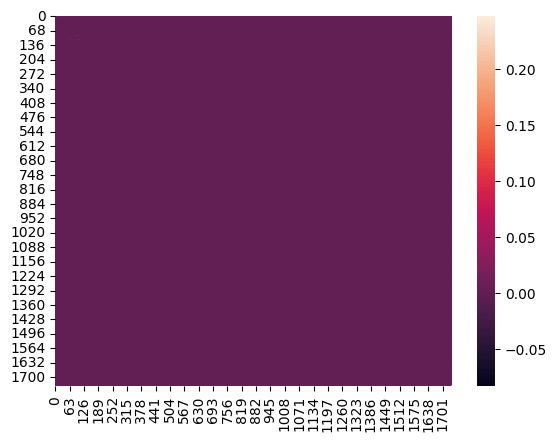

In [13]:
sns.heatmap(c)
plt.show()

We don't get any insights from here.

### Dimensionality Reduction

In [14]:
from sklearn.decomposition import PCA

In [15]:
pca = PCA(n_components=2,svd_solver='full')
X = pca.fit_transform(df)

In [16]:
X = pd.DataFrame(X, columns = ['PC1', 'PC2'])
X

,PC1,PC2
0,-0.468475,-0.353612
1,0.884604,0.005658
2,0.924002,0.064415
3,0.097627,0.878717
4,-0.557117,-0.356680
...,...,...
2305,0.936378,0.168761
2306,0.021755,0.927828
2307,0.854606,-0.005908
2308,0.869484,0.022087


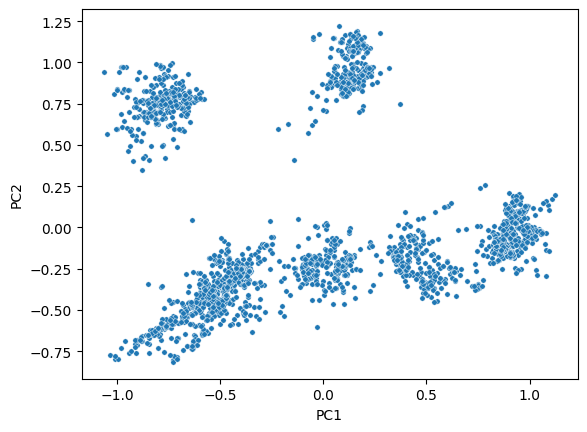

In [17]:
sns.scatterplot(X,y='PC2',x='PC1',s=15)
plt.show()

### DBSCAN Clustering

In [18]:
from sklearn.cluster import DBSCAN

In [19]:
model = DBSCAN(eps=0.3,min_samples=4)
model.fit(X)

DBSCAN(eps=0.3, min_samples=4)

In [20]:
model.labels_

array([0, 0, 0, ..., 0, 0, 0])

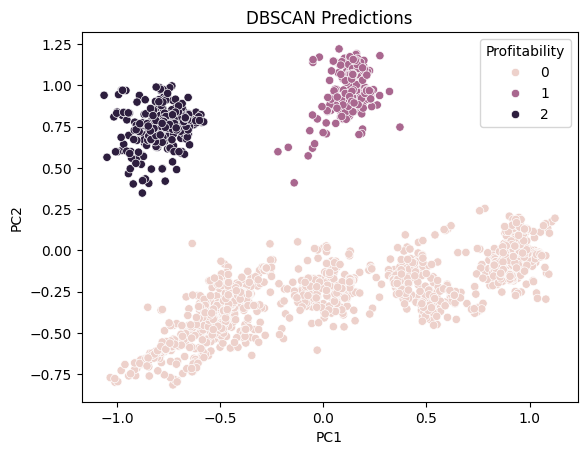

In [21]:
sns.scatterplot(X,y='PC2',x='PC1',hue=model.labels_).set(title='DBSCAN Predictions')
plt.legend(title='Profitability', loc='upper right')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

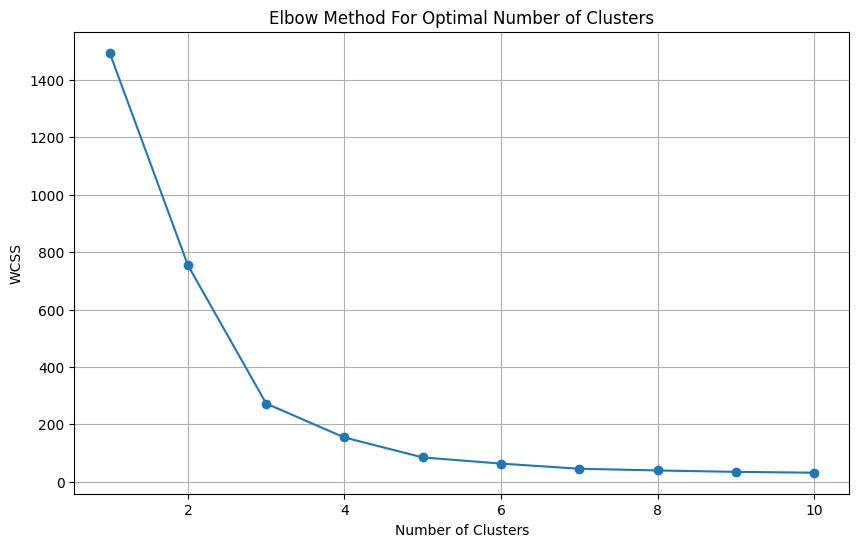

In [26]:
# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


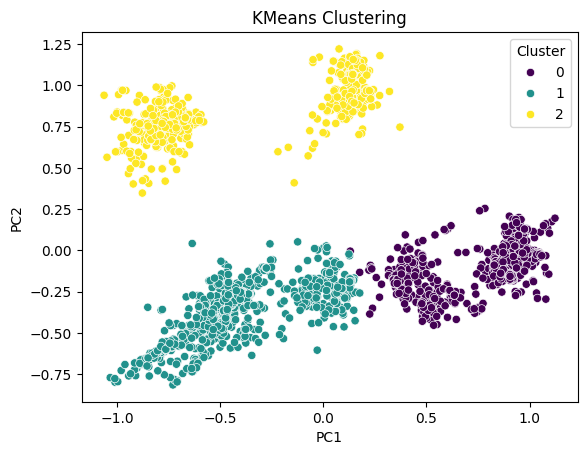

In [27]:
# Apply KMeans with the optimal number of clusters
optimal_clusters = 3  # This should be chosen based on the elbow plot
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
X['Cluster'] = kmeans.fit_predict(X)

sns.scatterplot(data=X, x='PC1', y='PC2', hue='Cluster', palette='viridis')
plt.title('KMeans Clustering')
plt.legend(title='Cluster')
plt.show()